## Programming Assignment 5
#### In this assignment, you will be implementing Tomasi-Kanade	Factorization algorithm	for Rigid Structure from Motion.

### Task 1
#### Load the data file and generate a 2D image dataset	by generating an orthographic camera with optical axis paralle to the XY plane, which rotates around the teapot	in 10° increments and always looks towards the center of the object
#### Note: Code for loading the point cloud and visualizing it has been given to you. Further build on it and take images of the teapot and visualize them

In [37]:
from scipy.io import loadmat
x = loadmat('teapot.mat')

In [38]:
a = []
b = []
c = []
for points in x['verts']:
    a.append(points[0])
    b.append(points[1])
    c.append(points[2])

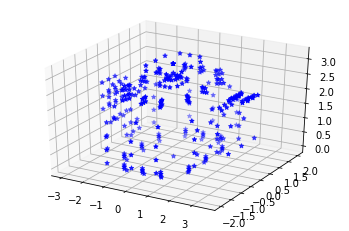

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,c, c='b', marker='*')

In [40]:
### Your implementation comes here
intrinsic = np.array([[1, 0, 0],[0, 1, 0]])

def rotation_matrix_y(angle):
    rot_angle=math.radians(angle)
    R = np.array([[math.cos(rot_angle),0,math.sin(rot_angle)],[0,1,0],[-math.sin(rot_angle),0,math.cos(rot_angle)]])
    return R 

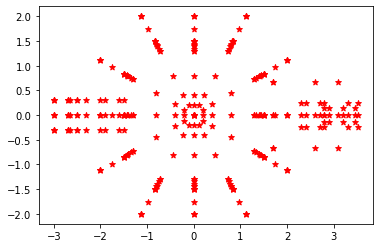

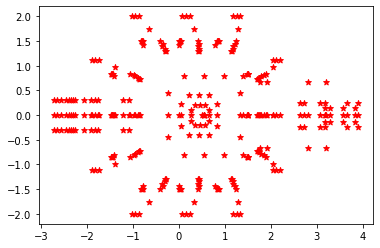

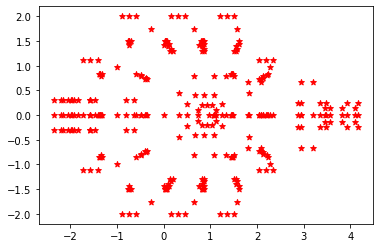

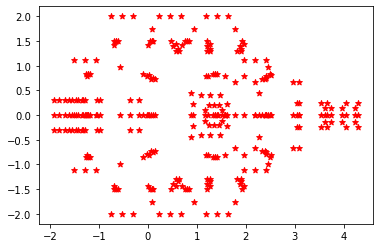

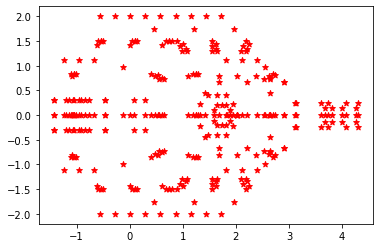

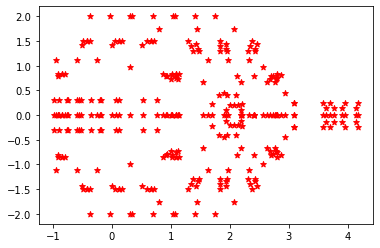

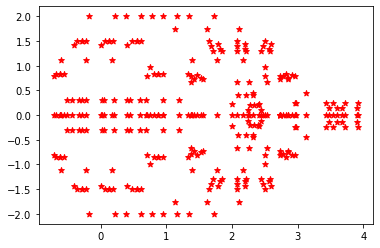

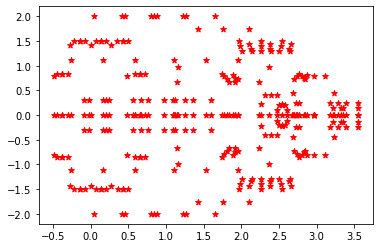

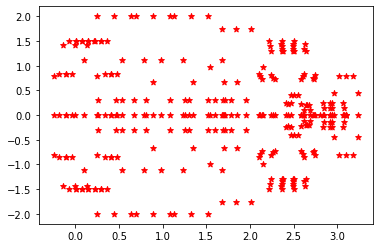

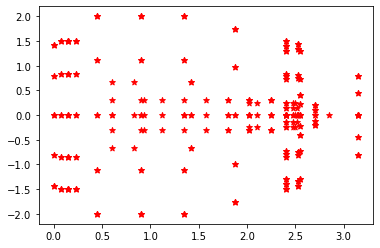

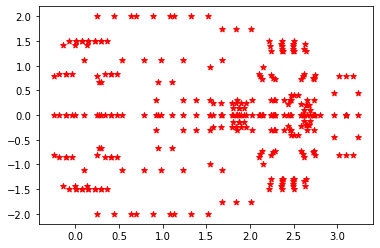

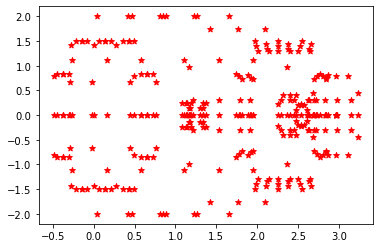

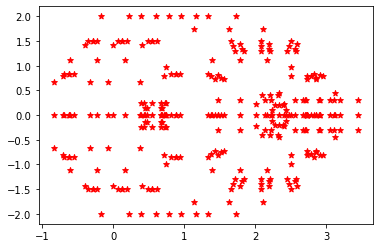

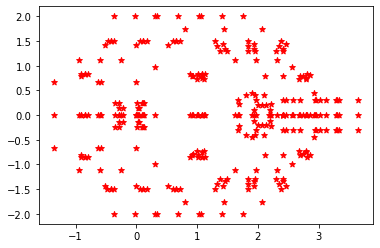

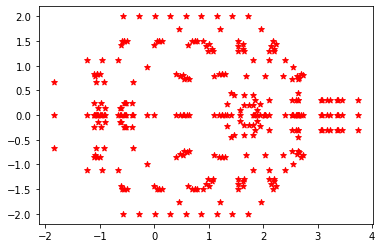

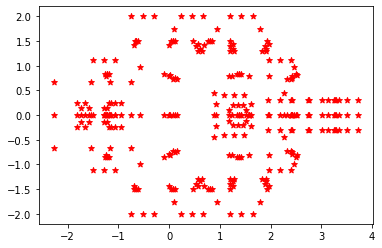

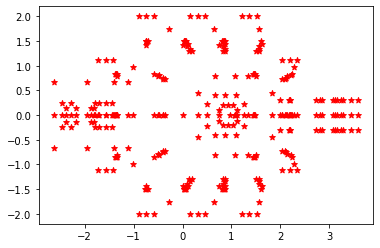

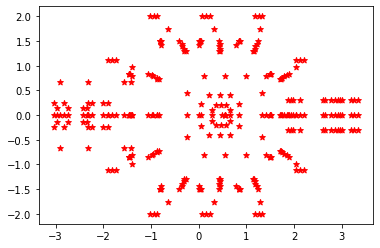

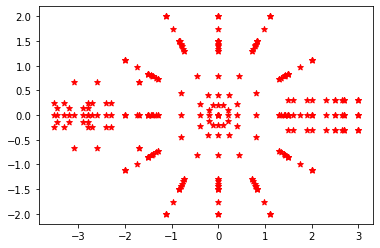

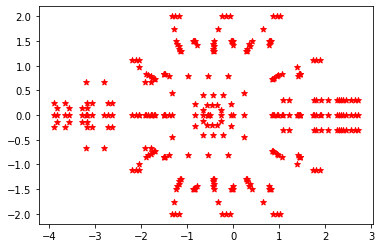

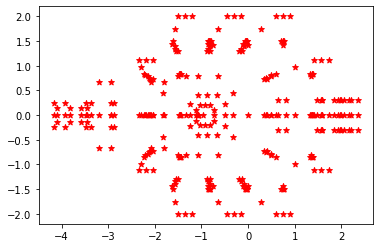

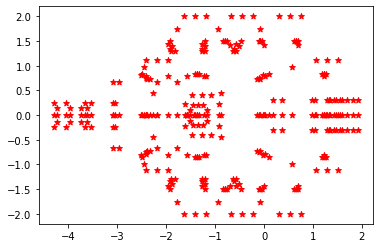

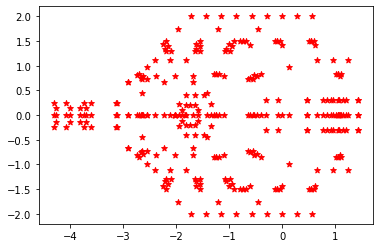

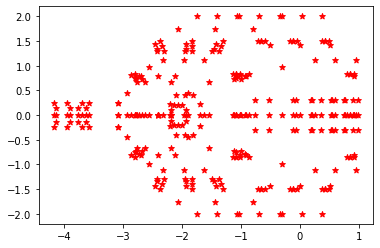

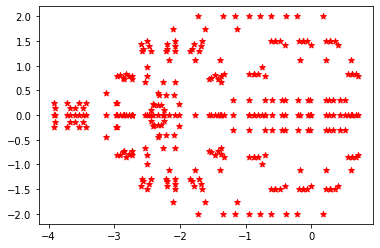

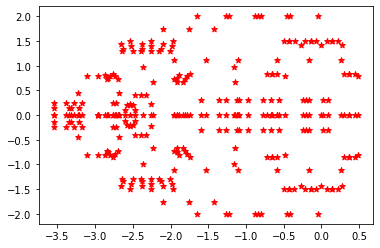

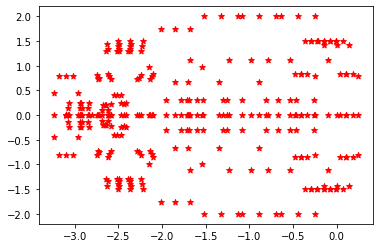

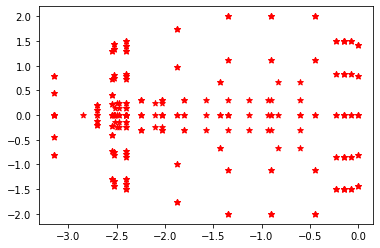

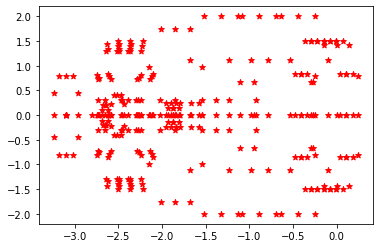

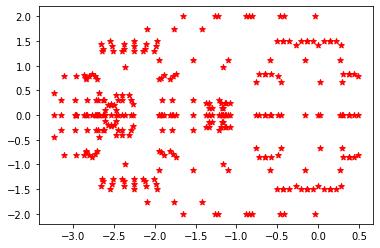

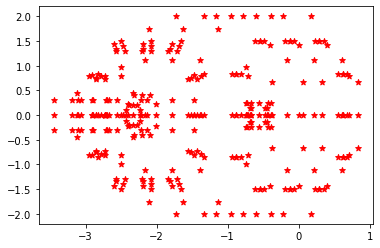

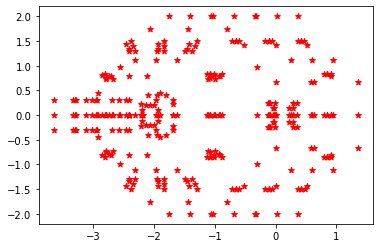

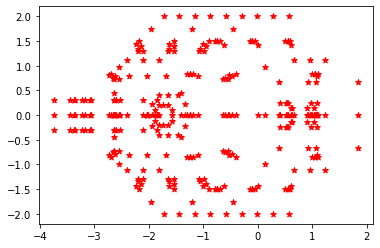

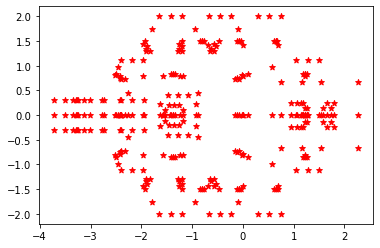

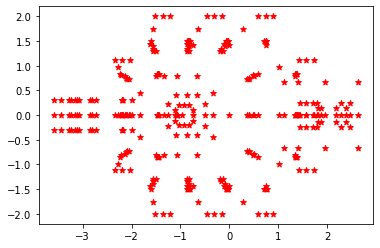

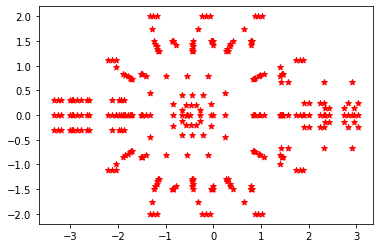

In [41]:
### Your implementation comes here
# Hint: new2Dpts = K[R|T]*3DPoints

newR = []

for i in range(0,360,10):
  newR.append(rotation_matrix_y(i))

TDPoints = np.array(x['verts'])
R = np.array(newR)
new2Dpts = intrinsic @ R @ TDPoints.T

fig = plt.figure()

for i in new2Dpts:
  plt.scatter(i[0], i[1],c='r', marker='*')
  plt.show()


### Task 2
#### Use the data generated in previous task to generate a W matrix, and use that as input in Tomasi Kanade Factorization method to compute the 3D structure

In [42]:
## Your implementation for Tomasi Kanade Factorization method comes here
mypts = []

for i in new2Dpts:
  mypts.append(i[0])
  mypts.append(i[1])
W = np.array(mypts)

u, s, vh = np.linalg.svd(W)

newS = np.zeros((3, 3))
row,col = np.diag_indices(newS.shape[0])

# Taking first 3 columns
u = u[:,:3]
# Taking first 3 by 3 block
newS[row, col] = s[0:3]
# Taking first 3 rows
vh = vh[:3,:]

rhat = u
## This shows that the model is being scaled
s_hat = newS @ vh

A = []
b = []
for i in range(36):
    r = rhat[i:i+2]
    row1 = [r[0][0]*r[0][0] , 2*r[0][0]*r[0][1] , 2*r[0][0]*r[0][2], r[0][1]*r[0][1] ,2*r[0][1]*r[0][2], r[0][2]*r[0][2]]
    row2 = [r[0][0]*r[1][0] , ((r[0][1]*r[1][0]) + (r[0][0]*r[1][1])), ((r[0][2]*r[1][0])+ (r[0][0]*r[1][2])), r[0][1]*r[1][1] ,((r[0][2]*r[1][1])+(r[0][1]*r[1][2])), r[0][2]*r[1][2]]
    row3 = [r[1][0]*r[1][0], 2*r[1][0]*r[1][1] , ((r[1][0]*r[1][0]) + (r[1][0]*r[1][2])), r[1][1]*r[1][1], ((r[1][1] * r[1][1])+ (r[1][2]*r[1][2])), r[1][2]*r[1][2]]
   
    A.append(row1)
    A.append(row2)
    A.append(row3)
   
    b.append(1)
    b.append(0)
    b.append(1)  

A = np.array(A)
b = np.array(b)

newlist = np.linalg.inv(A.T @ A) @ (A.T @ b)

qVals = np.zeros((3, 3))
qVals[0][0], qVals[0][1], qVals[0][2], qVals[1][0], qVals[1][1], qVals[1][2], qVals[2][0], qVals[2][1], qVals[2][2] = newlist[0], newlist[1], newlist[2], newlist[1], newlist[3], newlist[4], newlist[3], newlist[4], newlist[5] 

Q = np.linalg.cholesky(qVals)

Q_inv = np.linalg.inv(Q)
values = Q_inv @ s_hat

a1 = values[0]
b1 = values[1]
c1 = values[2]

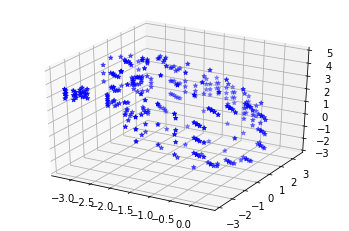

In [43]:
## Plot the reconstructed mode

# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the reconstructed 3D points are 
# in variables a1, b1 and c1 respectively, the reconstructed model can be plotted as:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1,b1,c1, c='b', marker='*')

In [44]:
## Evaluate your reconstruction
# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the 3D points that you have reconstructed are 
# in variables a1, b1 and c1 respectively, the error in reconstruction can be calcualted as:

err = 0.0
j = 0
for i in range(108):
  err = err + math.sqrt( ((a1[i]-a[i])*(a1[i]-a[i])) + ((b1[i]-b[i])*(b1[i]-b[i])) + ((c1[i]-c[i])*(c1[i]-c[i])) )
  j=j+1

print ("Mean Euclidean Error : ",(err/j))

Mean Euclidean Error :  3.1871234017260086
